<a href="https://colab.research.google.com/github/roscoekerby/FREE-OpenCV-Bootcamp/blob/main/Accessing_Camera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using OpenCV Locally to get a video

In [ ]:
import cv2
import sys

s = 0
if len(sys.argv) > 1:
    s = sys.argv[1]

source = cv2.VideoCapture(s)

win_name = 'Camera Preview'
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)

while cv2.waitKey(1) != 27: # Escape
    has_frame, frame = source.read()
    if not has_frame:
        break
    cv2.imshow(win_name, frame)

source.release()
cv2.destroyWindow(win_name)

Better one that you can use p to take photo, v to start video, and s to stop the video, q to quit

In [1]:
import cv2
import sys

# Initialize counters for images and videos
image_counter = 1
video_counter = 1
recording = False

if len(sys.argv) > 1:
    s = sys.argv[1]
else:
    s = 0

source = cv2.VideoCapture(s)
if not source.isOpened():
    print("Error: Could not open video source.")
    sys.exit()

win_name = 'Camera Preview'
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)

# Video writer setup
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = None
message = ""
message_display_counter = 0
message_display_time = 50  # Display message for 50 frames

while True:
    ret, frame = source.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    # Display the message on the frame if the counter is positive
    if message_display_counter > 0:
        cv2.putText(frame, message, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        message_display_counter -= 1

    cv2.imshow(win_name, frame)

    key = cv2.waitKey(1) & 0xFF

    if key == ord('p'):
        # Save image
        image_filename = f'image_{image_counter}.jpg'
        cv2.imwrite(image_filename, frame)
        message = f"Saved {image_filename}"
        message_display_counter = message_display_time
        print(message)
        image_counter += 1

    elif key == ord('v'):
        if not recording:
            video_filename = f'video_{video_counter}.mp4'
            out = cv2.VideoWriter(video_filename, fourcc, 20.0, (frame.shape[1], frame.shape[0]))
            recording = True
            message = f"Started recording {video_filename}"
            message_display_counter = message_display_time
            print(message)

    elif key == ord('s'):
        if recording:
            recording = False
            out.release()
            message = f"Stopped recording {video_filename}"
            message_display_counter = message_display_time
            print(message)
            video_counter += 1

    elif key == ord('q'):
        break

    if recording:
        out.write(frame)

source.release()
if out is not None:
    out.release()
cv2.destroyAllWindows()


Error: Could not open video source.


SystemExit: 

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Accessing Camera using JS for Colab for image capture

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


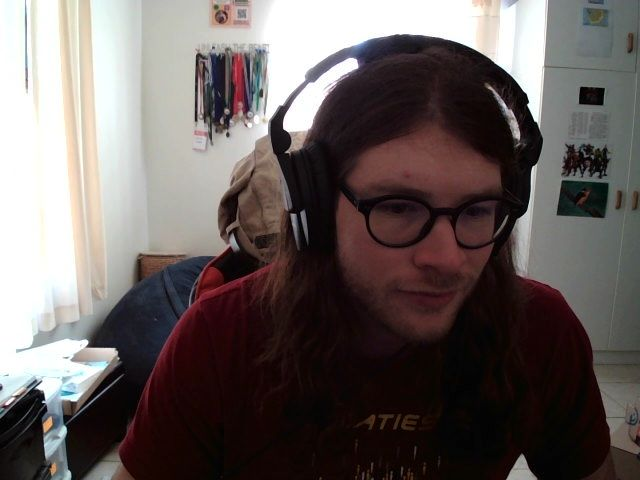

In [2]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Create and save a video using JS in colab

In [15]:
from IPython.display import display, Javascript, HTML
from google.colab.output import eval_js, register_callback
from base64 import b64decode

# JavaScript for video recording
def record_video(filename='video.webm'):
    js = Javascript('''
    async function recordVideo() {
        const div = document.createElement('div');

        // Create video element to display the video feed
        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        // Create buttons for start and stop recording
        const recordButton = document.createElement('button');
        recordButton.textContent = 'Start Recording';
        div.appendChild(recordButton);

        const stopButton = document.createElement('button');
        stopButton.textContent = 'Stop Recording';
        stopButton.style.display = 'none'; // Hide stop button initially
        div.appendChild(stopButton);

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        let recorder = new MediaRecorder(stream, {
            mimeType: 'video/webm; codecs="vp8"'
        });
        let recordingData = [];

        recordButton.onclick = function() {
            recorder.start();
            recordButton.textContent = 'Recording...';
            recordButton.disabled = true;
            stopButton.style.display = 'inline-block';
        }

        stopButton.onclick = function() {
            recorder.stop();
            recordButton.textContent = 'Start Recording';
            recordButton.disabled = false;
            stopButton.style.display = 'none';
        }

        recorder.ondataavailable = e => {
            recordingData.push(e.data);
        };

        recorder.onstop = async () => {
            const blob = new Blob(recordingData, { type: 'video/webm' });
            stream.getVideoTracks()[0].stop();
            div.remove();

            const reader = new FileReader();
            reader.onload = () => {
                google.colab.kernel.invokeFunction('notebook.save_video', [reader.result], {});
            };
            reader.readAsDataURL(blob);
        };
    }
    recordVideo();
    ''')

    display(js)

# Python function to handle saving the video file
def save_video(data, filename='video.webm'):
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    print(f'Video saved as {filename}')

# Register the Python function as a callback
register_callback('notebook.save_video', save_video)

# Execute recording and saving process
record_video()


<IPython.core.display.Javascript object>

Video saved as video.webm
